In [1]:
import pandas as pd


In [2]:
file_path = r"C:\Users\duydo\OneDrive\Desktop\mid-term-project\Data\hour.csv"
# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [3]:
# Check dataset summary
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display basic summary
print("Columns in the dataset:", df.columns)
print("Missing values per column:\n", df.isnull().sum())
print("Summary statistics:\n", df.describe())


Columns in the dataset: Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
Missing values per column:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Summary statistics:
           instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.00000

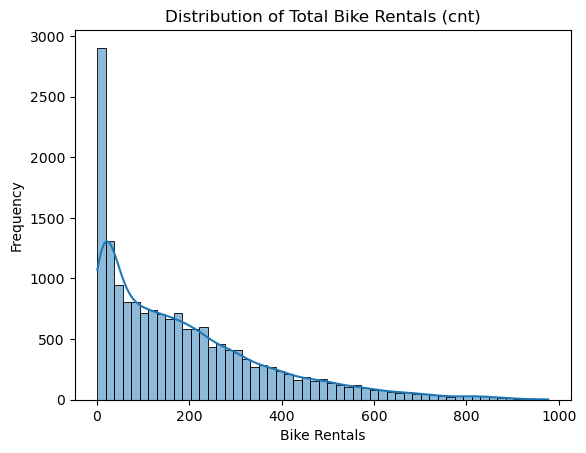

In [5]:
# Target variable distribution
sns.histplot(df['cnt'], kde=True)
plt.title("Distribution of Total Bike Rentals (cnt)")
plt.xlabel("Bike Rentals")
plt.ylabel("Frequency")
plt.show()


C:\Users\duydo\AppData\Local\Temp\ipykernel_30300\547377684.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


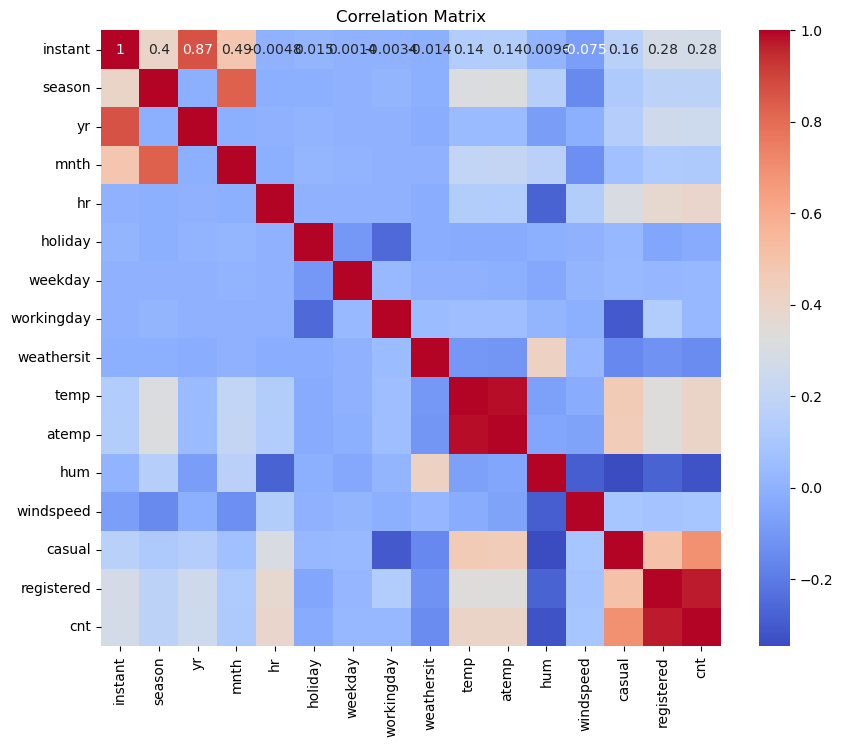

In [6]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

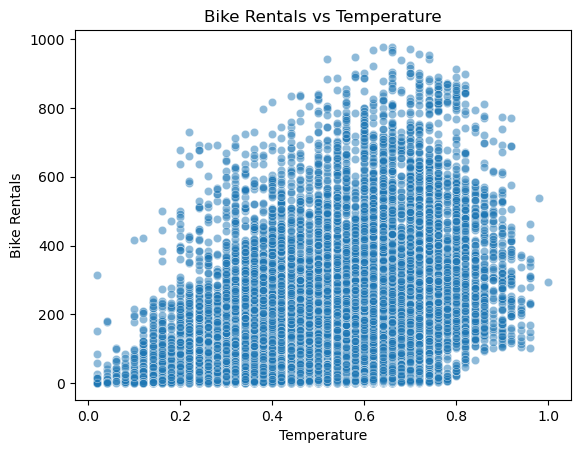

In [7]:
# Scatter plot: temperature vs bike rentals
sns.scatterplot(data=df, x='temp', y='cnt', alpha=0.5)
plt.title("Bike Rentals vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("Bike Rentals")
plt.show()

In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np

In [9]:
# Feature engineering: Create a binary feature for high-demand hours
df['high_demand'] = (df['cnt'] > 500).astype(int)  # 1 if rentals > 500, else 0

# One-hot encode categorical features
categorical_cols = ['season', 'weathersit', 'mnth', 'weekday', 'hr']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed']
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Split the dataset into predictors and targets for regression and classification
X = df_encoded.drop(columns=['cnt', 'casual', 'registered', 'high_demand'])
y_regression = df_encoded['cnt']  # Target for regression
y_classification = df_encoded['high_demand']  # Target for classification

print("Prepared dataset for modeling!")

Prepared dataset for modeling!


In [10]:
from sklearn.model_selection import train_test_split

# Split data for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_regression, test_size=0.2, random_state=42
)

# Split data for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_classification, test_size=0.2, random_state=42
)

print("Data successfully split for regression and classification!")


Data successfully split for regression and classification!


In [11]:
# Convert 'dteday' to datetime format
df['dteday'] = pd.to_datetime(df['dteday'])

# Extract useful features from 'dteday'
df['day'] = df['dteday'].dt.day
df['day_of_week'] = df['dteday'].dt.dayofweek  # Monday=0, Sunday=6

# Drop the 'dteday' column as it's no longer needed
df.drop(columns=['dteday'], inplace=True)

# Verify that the dataset no longer contains non-numeric columns
print("Feature types after processing 'dteday':\n", df.dtypes)

# Ensure 'X_train_reg' and 'X_test_reg' are updated
X = df.drop(columns=['cnt', 'casual', 'registered', 'high_demand'])  # Update predictors
y_regression = df['cnt']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_regression, test_size=0.2, random_state=42
)

# Confirm all features in X_train_reg are numeric
print("Feature types in X_train_reg after processing:\n", X_train_reg.dtypes)

Feature types after processing 'dteday':
 instant          int64
season           int64
yr               int64
mnth             int64
hr               int64
holiday          int64
weekday          int64
workingday       int64
weathersit       int64
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
high_demand      int32
day              int64
day_of_week      int64
dtype: object
Feature types in X_train_reg after processing:
 instant          int64
season           int64
yr               int64
mnth             int64
hr               int64
holiday          int64
weekday          int64
workingday       int64
weathersit       int64
temp           float64
atemp          float64
hum            float64
windspeed      float64
day              int64
day_of_week      int64
dtype: object


 Regression Models

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)
y_pred_lr = lr.predict(X_test_reg)
rmse_lr = np.sqrt(mean_squared_error(y_test_reg, y_pred_lr))
print(f"Linear Regression RMSE: {rmse_lr:.2f}")

Linear Regression RMSE: 139.17


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=None)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf = rf_reg.predict(X_test_reg)

# Calculate RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test_reg, y_pred_rf))
print(f"Random Forest Regressor RMSE: {rmse_rf:.2f}")

Random Forest Regressor RMSE: 40.29


Compared the RMSE => Random Forest, being  a more complex and non-linear model, is better suited for this dataset 
Random Forest is currently the better model for predicting bike rentals (cnt) based on RMSE.
Linear Regression might still serve as a good baseline for simpler problems but struggles with non-linear relationships.

 Logistic Regression for Classification

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [15]:
if 'dteday' in X.columns:
    df['dteday'] = pd.to_datetime(df['dteday'])  # Convert to datetime if needed
    df['day'] = df['dteday'].dt.day            # Extract useful features
    df['day_of_week'] = df['dteday'].dt.dayofweek
    df.drop(columns=['dteday'], inplace=True)  # Drop 'dteday'

# Re-create the classification target and predictors
X = df.drop(columns=['cnt', 'casual', 'registered', 'high_demand'])  # Features
y_classification = df['high_demand']  # Target

# Re-split the data for classification
from sklearn.model_selection import train_test_split

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_classification, test_size=0.2, random_state=42
)

# Verify all features in X_train_clf are numeric
print("Feature types in X_train_clf:\n", X_train_clf.dtypes)

Feature types in X_train_clf:
 instant          int64
season           int64
yr               int64
mnth             int64
hr               int64
holiday          int64
weekday          int64
workingday       int64
weathersit       int64
temp           float64
atemp          float64
hum            float64
windspeed      float64
day              int64
day_of_week      int64
dtype: object


In [16]:
# Scale the classification data
scaler = StandardScaler()
X_train_clf_scaled = scaler.fit_transform(X_train_clf)
X_test_clf_scaled = scaler.transform(X_test_clf)


lr_clf = LogisticRegression(random_state=42, max_iter=500, class_weight='balanced')
lr_clf.fit(X_train_clf, y_train_clf)
y_pred_lr_clf = lr_clf.predict(X_test_clf)

In [17]:
from sklearn.metrics import classification_report, accuracy_score
print(f"Logistic Regression Accuracy: {accuracy_score(y_test_clf, y_pred_lr_clf):.2f}")
print("Classification Report:\n", classification_report(y_test_clf, y_pred_lr_clf))

Logistic Regression Accuracy: 0.71
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.70      0.82      3231
           1       0.16      0.75      0.26       245

    accuracy                           0.71      3476
   macro avg       0.57      0.73      0.54      3476
weighted avg       0.92      0.71      0.78      3476



In [18]:
lr_clf_weighted = LogisticRegression(random_state=42, max_iter=500, class_weight='balanced')
lr_clf_weighted.fit(X_train_clf_scaled, y_train_clf)
y_pred_lr_weighted = lr_clf_weighted.predict(X_test_clf_scaled)

# Evaluate the performance
print(f"Weighted Logistic Regression Accuracy: {accuracy_score(y_test_clf, y_pred_lr_weighted):.2f}")
print("Classification Report (Weighted):\n", classification_report(y_test_clf, y_pred_lr_weighted))

Weighted Logistic Regression Accuracy: 0.76
Classification Report (Weighted):
               precision    recall  f1-score   support

           0       0.98      0.75      0.85      3231
           1       0.20      0.82      0.32       245

    accuracy                           0.76      3476
   macro avg       0.59      0.79      0.59      3476
weighted avg       0.93      0.76      0.81      3476



In [19]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier with class weights
rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)
rf_clf.fit(X_train_clf_scaled, y_train_clf)
y_pred_rf_clf = rf_clf.predict(X_test_clf_scaled)

# Evaluate the performance
print(f"Random Forest Classifier Accuracy: {accuracy_score(y_test_clf, y_pred_rf_clf):.2f}")
print("Classification Report (Random Forest):\n", classification_report(y_test_clf, y_pred_rf_clf))

Random Forest Classifier Accuracy: 0.97
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3231
           1       0.94      0.68      0.79       245

    accuracy                           0.97      3476
   macro avg       0.96      0.84      0.89      3476
weighted avg       0.97      0.97      0.97      3476



Best Model: Based on the results, the Random Forest Classifier is the best-performing model for this classification task. It achieves:

High precision and recall for the minority class (1 - high demand).
Excellent overall accuracy (97%).


Hyperparameter Tuning:

In [20]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, 
                           scoring='f1_macro', cv=3, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_clf_scaled, y_train_clf)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_rf_clf = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}


In [22]:
from sklearn.metrics import classification_report, accuracy_score

# Predict using the best Random Forest model
y_pred_best_rf = best_rf_clf.predict(X_test_clf_scaled)

# Evaluate performance
print(f"Tuned Random Forest Accuracy: {accuracy_score(y_test_clf, y_pred_best_rf):.2f}")
print("Classification Report (Tuned Random Forest):\n", classification_report(y_test_clf, y_pred_best_rf))

Tuned Random Forest Accuracy: 0.98
Classification Report (Tuned Random Forest):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3231
           1       0.84      0.81      0.83       245

    accuracy                           0.98      3476
   macro avg       0.91      0.90      0.91      3476
weighted avg       0.98      0.98      0.98      3476



In [23]:
import pickle

# Save the tuned Random Forest model to a file
with open("tuned_random_forest.pkl", "wb") as file:
    pickle.dump(best_rf_clf, file)

print("Tuned model saved as 'tuned_random_forest.pkl'")

Tuned model saved as 'tuned_random_forest.pkl'


In [24]:
print("Features used in training:", X.columns.tolist())

Features used in training: ['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'day', 'day_of_week']


In [26]:
print(pd.Series(y_train_clf).value_counts())

0    12869
1     1034
Name: high_demand, dtype: int64


Decision Tree Training and Visualization

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Train a single decision tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_clf, y_train_clf)

# Predict using the decision tree
y_pred_dt = dt_clf.predict(X_test_clf)

# Evaluate the decision tree
print("Decision Tree Classification Report:\n", classification_report(y_test_clf, y_pred_dt))


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3231
           1       0.83      0.84      0.84       245

    accuracy                           0.98      3476
   macro avg       0.91      0.92      0.91      3476
weighted avg       0.98      0.98      0.98      3476



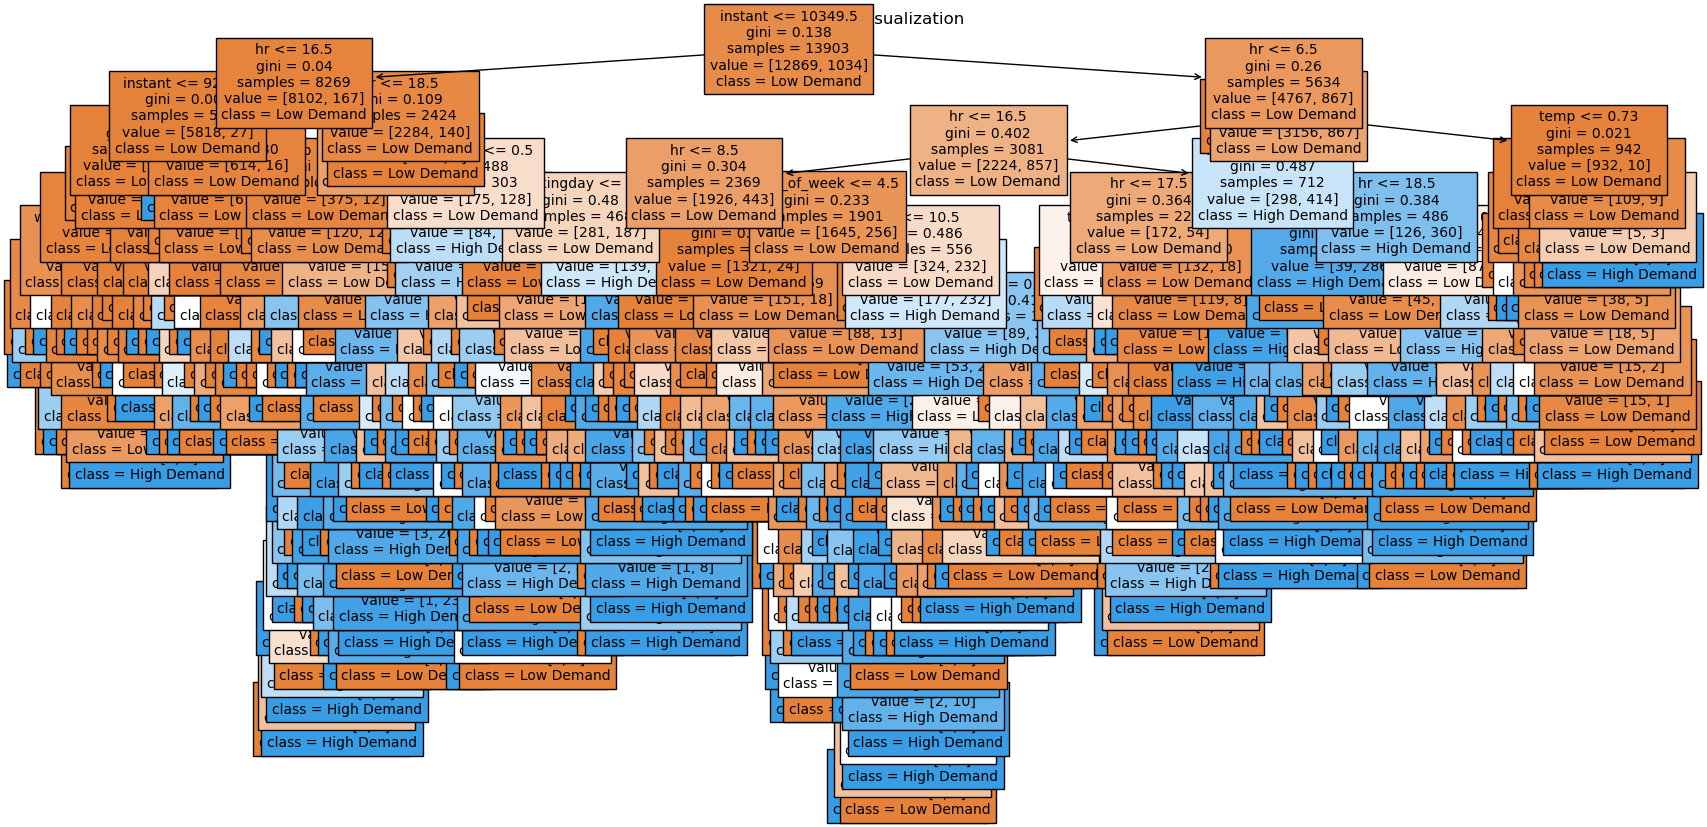

In [29]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_clf,
    feature_names=X.columns,
    class_names=["Low Demand", "High Demand"],
    filled=True,
    fontsize=10,
)
plt.title("Decision Tree Visualization")
plt.show()


In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Train XGBoost
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train_clf, y_train_clf)

# Predict using XGBoost
y_pred_xgb = xgb_clf.predict(X_test_clf)

# Evaluate XGBoost
print("XGBoost Classification Report:\n", classification_report(y_test_clf, y_pred_xgb))


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3231
           1       0.92      0.88      0.90       245

    accuracy                           0.99      3476
   macro avg       0.96      0.94      0.95      3476
weighted avg       0.99      0.99      0.99      3476



In [31]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(XGBClassifier(random_state=42), param_grid, scoring='f1_macro', cv=3, verbose=2, n_jobs=-1)
grid_search_xgb.fit(X_train_clf, y_train_clf)

# Get the best XGBoost model
best_xgb_clf = grid_search_xgb.best_estimator_
print("Best XGBoost Parameters:", grid_search_xgb.best_params_)

# Predict with the tuned XGBoost
y_pred_best_xgb = best_xgb_clf.predict(X_test_clf)

# Evaluate the tuned XGBoost
print("Tuned XGBoost Classification Report:\n", classification_report(y_test_clf, y_pred_best_xgb))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Tuned XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3231
           1       0.91      0.87      0.89       245

    accuracy                           0.98      3476
   macro avg       0.95      0.93      0.94      3476
weighted avg       0.98      0.98      0.98      3476

